In [993]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score, log_loss, f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA 
%matplotlib inline

In [994]:
df = pd.read_csv('C:/Users/HP/Desktop/zschallenge/data.csv')

In [995]:
#ind=pd.isna(df["is_goal"]) 


In [996]:
#test.head()

In [997]:
#test=df[ind]

In [998]:
#test.head()

In [999]:
#test["is_goal"].head()

In [1000]:

##ind1=pd.notna(df["is_goal"])
#train=df[ind1]

In [1001]:
df["type_of_shot"]=df["type_of_shot"].fillna(df["type_of_combined_shot"])
df["lat/lng"]=df["lat/lng"]=="42.982923, -71.446094"
df["lat/lng"]=list(map(int,df["lat/lng"]))
df["home/away"]=df["lat/lng"]

In [1002]:
df=df.drop(["match_event_id","game_season","team_name","date_of_game","match_id","team_id","lat/lng","type_of_combined_shot","remaining_min.1","power_of_shot.1","knockout_match.1","remaining_sec.1","distance_of_shot.1"],axis=1)

In [1003]:
df.head()

,Unnamed: 0,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot
0,0,167.0,72.0,10.0,1.0,0.0,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,0,1.0,shot - 30
1,1,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,0,2.0,shot - 45
2,2,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,0,3.0,shot - 25
3,3,138.0,175.0,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,0,4.0,shot - 3
4,4,0.0,0.0,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,0,5.0,shot - 1


In [1004]:
#df["shot_basics"] = df["shot_basics"].astype('category')
#df["shot_basics"] = df["shot_basics"].cat.codes
'''oe=OneHotEncoder()
df['shot_basics'] = oe.fit_transform(df['shot_basics'])
df['area_of_shot'] = oe.fit_transform(df['area_of_shot'])
df['range_of_shot'] = oe.fit_transform(df['range_of_shot'])'''


"oe=OneHotEncoder()\ndf['shot_basics'] = oe.fit_transform(df['shot_basics'])\ndf['area_of_shot'] = oe.fit_transform(df['area_of_shot'])\ndf['range_of_shot'] = oe.fit_transform(df['range_of_shot'])"

In [1005]:
df.dropna(thresh=4,inplace=True)

In [1006]:
#df["area_of_shot"] = df["area_of_shot"].astype('category')
#df["area_of_shot"] = df["area_of_shot"].cat.codes


In [1007]:
#df["range_of_shot"] = df["range_of_shot"].astype('category')
#df["range_of_shot"] = df["range_of_shot"].cat.codes
#df["shot_basics"] = df["shot_basics"].astype('category')
#df["shot_basics"] = df["shot_basics"].cat.codes


In [1008]:
df.head()

,Unnamed: 0,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot
0,0,167.0,72.0,10.0,1.0,0.0,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,0,1.0,shot - 30
1,1,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,0,2.0,shot - 45
2,2,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,0,3.0,shot - 25
3,3,138.0,175.0,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,0,4.0,shot - 3
4,4,0.0,0.0,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,0,5.0,shot - 1


In [1009]:
'''df["shot_basics"].fillna(df["shot_basics"].mode()[0], inplace=True)
df["area_of_shot"].fillna(df["area_of_shot"].mode()[0], inplace=True)
df["knockout_match"].fillna(df["knockout_match"].mode()[0], inplace=True)
df["location_x"].fillna(df["location_x"].median(), inplace=True)
df["location_y"].fillna(df["location_y"].median(), inplace=True)
df["power_of_shot"].fillna(df["power_of_shot"].mode()[0], inplace=True)
df["remaining_sec"].fillna(df["remaining_sec"].mean(), inplace=True)
df["distance_of_shot"].fillna(df["distance_of_shot"].median(), inplace=True)
df["range_of_shot"].fillna(df["range_of_shot"].mode()[0], inplace=True)
df["home/away"].fillna(df["home/away"].mode()[0], inplace=True)
df["remaining_min"].fillna(df["remaining_min"].mean(), inplace=True)
df['shot_id_number'] = df.reset_index().index+1'''
le=preprocessing.LabelEncoder()
df["type_of_shot"]=le.fit_transform(df["type_of_shot"])

In [1010]:
df["shot_basics"]=df["shot_basics"].fillna(method='ffill').fillna(method='bfill')
df["area_of_shot"]=df["area_of_shot"].fillna(method='ffill').fillna(method='bfill')
df["knockout_match"]=df["knockout_match"].fillna(method='ffill').fillna(method='bfill')
df["location_x"].fillna(df["location_x"].median(), inplace=True)
df["location_y"].fillna(df["location_y"].median(), inplace=True)
df["power_of_shot"]=df["power_of_shot"].fillna(method='ffill').fillna(method='bfill')
df["remaining_sec"].fillna(df["remaining_sec"].mean(), inplace=True)
df["distance_of_shot"].fillna(df["distance_of_shot"].median(), inplace=True)
df["range_of_shot"]=df["range_of_shot"].fillna(method='ffill').fillna(method='bfill')
df["home/away"]=df["home/away"].fillna(method='ffill').fillna(method='bfill')
df["remaining_min"].fillna(df["remaining_min"].mean(), inplace=True)
df['shot_id_number'] = df.reset_index().index+1

In [1011]:
df.isna().sum()

Unnamed: 0             0
location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
home/away              0
shot_id_number         0
type_of_shot           0
dtype: int64

In [1012]:
#df=pd.get_dummies(df, prefix=['shot_basics', 'area_of_shot','range_of_shot'])
df["area_of_shot"] = df["area_of_shot"].astype('category')
df["area_of_shot"] = df["area_of_shot"].cat.codes
df["range_of_shot"] = df["range_of_shot"].astype('category')
df["range_of_shot"] = df["range_of_shot"].cat.codes
df["shot_basics"] = df["shot_basics"].astype('category')
df["shot_basics"] = df["shot_basics"].cat.codes
df["type_of_shot"] = df["type_of_shot"].astype('category')
df["type_of_shot"] = df["type_of_shot"].cat.codes

In [1013]:
df.head()

,Unnamed: 0,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot
0,0,167.0,72.0,10.000000,1.0,0.0,27.0,38.0,NaN,5,4,0,0,1,24
1,1,-157.0,0.0,10.000000,1.0,0.0,22.0,35.0,0.0,2,4,2,0,2,40
2,2,-101.0,135.0,7.000000,1.0,0.0,45.0,36.0,1.0,1,4,0,0,3,18
3,3,138.0,175.0,6.000000,1.0,0.0,52.0,42.0,0.0,4,4,0,0,4,23
4,4,0.0,0.0,4.883233,2.0,0.0,19.0,20.0,1.0,0,0,4,0,5,1


In [1014]:
df.columns

Index(['Unnamed: 0', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'home/away',
       'shot_id_number', 'type_of_shot'],
      dtype='object')

In [1015]:
df.isna().sum()

Unnamed: 0             0
location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
home/away              0
shot_id_number         0
type_of_shot           0
dtype: int64

In [1016]:
df.head()

,Unnamed: 0,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot
0,0,167.0,72.0,10.000000,1.0,0.0,27.0,38.0,NaN,5,4,0,0,1,24
1,1,-157.0,0.0,10.000000,1.0,0.0,22.0,35.0,0.0,2,4,2,0,2,40
2,2,-101.0,135.0,7.000000,1.0,0.0,45.0,36.0,1.0,1,4,0,0,3,18
3,3,138.0,175.0,6.000000,1.0,0.0,52.0,42.0,0.0,4,4,0,0,4,23
4,4,0.0,0.0,4.883233,2.0,0.0,19.0,20.0,1.0,0,0,4,0,5,1


In [1017]:
df.dtypes

Unnamed: 0            int64
location_x          float64
location_y          float64
remaining_min       float64
power_of_shot       float64
knockout_match      float64
remaining_sec       float64
distance_of_shot    float64
is_goal             float64
area_of_shot           int8
shot_basics            int8
range_of_shot          int8
home/away             int64
shot_id_number        int64
type_of_shot           int8
dtype: object

In [1018]:
'''for i in df["range_of_shot"]:
    if(i[0]=="L"):
        a=i.split(" ")
        i=int(a[2])
    else:
        a=i.strip(" ft.").split("-")
        print(a)
        i=(int(a[1])-int(a[0]))/2'''

'for i in df["range_of_shot"]:\n    if(i[0]=="L"):\n        a=i.split(" ")\n        i=int(a[2])\n    else:\n        a=i.strip(" ft.").split("-")\n        print(a)\n        i=(int(a[1])-int(a[0]))/2'

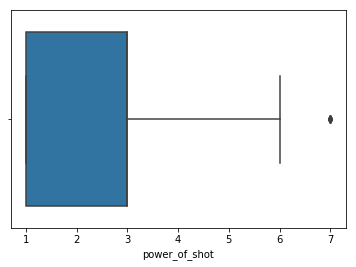

In [1019]:
sns.boxplot(x=df['power_of_shot'])

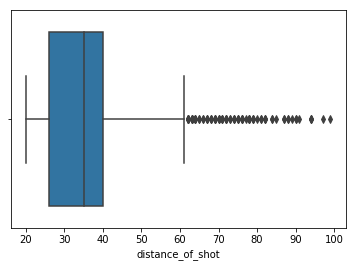

In [1020]:
sns.boxplot(x=df['distance_of_shot'])

In [1021]:
#sns.boxplot(x=df['shot_basics'])

In [1022]:
#df.to_csv("C:/Users/HP/Desktop/zschallenge/newdata.csv",index=False)

In [1023]:
df.isna().sum()

Unnamed: 0             0
location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
home/away              0
shot_id_number         0
type_of_shot           0
dtype: int64

In [1024]:
ind=pd.isna(df["is_goal"]) 
test=df[ind]
test["is_goal"].head()


0    NaN
7    NaN
16   NaN
19   NaN
21   NaN
Name: is_goal, dtype: float64

In [1025]:
ind1=pd.notna(df["is_goal"])
train=df[ind1]
train["is_goal"].head()

1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
Name: is_goal, dtype: float64

In [1026]:
#train.isna().sum()


In [1027]:
z = np.abs(stats.zscore(df))
print(z)


[[1.73199438 1.48645573 0.21358473 ... 0.92601149 1.73199438 0.20404487]
 [1.73188154 1.52422766 1.05540329 ... 0.92601149 1.73188154 1.17324395]
 [1.73176869 1.00386263 0.52300652 ... 0.92601149 1.73176869 0.72052817]
 ...
 [1.73176869 1.31050631 0.88545617 ... 0.92601149 1.73176869 0.29012542]
 [1.73188154 0.22271209 2.06634054 ... 1.07990021 1.73188154 0.63444762]
 [1.73199438 0.05605489 0.19020088 ... 1.07990021 1.73199438 1.17324395]]


In [1028]:
threshold = 3
print(len(np.where(z > 3)[0]))
train.shape

240


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(24429, 15)

In [1029]:
train=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
train.shape

(24295, 15)

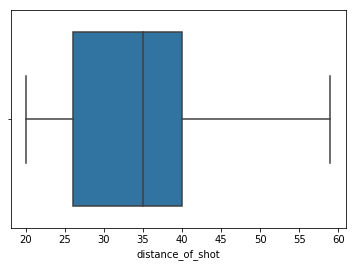

In [1030]:
sns.boxplot(x=train['distance_of_shot'])

In [1031]:
test.isna().sum()

Unnamed: 0             0
location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
home/away              0
shot_id_number         0
type_of_shot           0
dtype: int64

In [1032]:
train.to_csv("C:/Users/HP/Desktop/zschallenge/train.csv",index=False)
test.to_csv("C:/Users/HP/Desktop/zschallenge/test.csv",index=False)

In [1033]:
#train=pd.read_csv("D:/Downloads/train.csv")
feature=train[[ 
       'power_of_shot', 'knockout_match',  'distance_of_shot',
        'area_of_shot', 'shot_basics', 'range_of_shot', 'home/away',
       'type_of_shot']]
feature.head()


,power_of_shot,knockout_match,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,type_of_shot
1,1.0,0.0,35.0,2,4,2,0,40
2,1.0,0.0,36.0,1,4,0,0,18
3,1.0,0.0,42.0,4,4,0,0,23
4,2.0,0.0,20.0,0,0,4,0,1
5,3.0,0.0,34.0,2,4,2,0,9


In [1034]:
X=feature
X= preprocessing.StandardScaler().fit(X).transform(X)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  


In [1035]:
X


array([[-1.32632349, -0.41469626,  0.18096331, ...,  0.08148025,
        -0.92497118,  1.17130237],
       [-1.32632349, -0.41469626,  0.29416731, ..., -1.18625115,
        -0.92497118, -0.71767725],
       [-1.32632349, -0.41469626,  0.97339129, ..., -1.18625115,
        -0.92497118, -0.2883637 ],
       ...,
       [ 1.29457141,  2.41140348,  0.8601873 , ..., -1.18625115,
        -0.92497118, -0.2883637 ],
       [ 1.29457141,  2.41140348,  1.42620728, ..., -1.18625115,
         1.08111477, -0.63181454],
       [ 1.29457141,  2.41140348, -0.72466867, ...,  1.34921164,
         1.08111477,  1.17130237]])

In [1036]:

#sns.boxplot(x=X[0])

In [1037]:
y=train["is_goal"].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [758]:


Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc, std_acc

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of (K)')
plt.tight_layout()
plt.show()

In [683]:

svm = SVC(kernel='rbf')
svm = svm.fit(X_train,y_train) 
y_pred=svm.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,svm.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train accuracy score: 0.6687075529944433
Test accuracy score: 0.6190574192220621


In [1039]:
LR = LogisticRegression().fit(X_train,y_train)
y_pred=LR.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,LR.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))

Train accuracy score: 0.5913253755916855
Test accuracy score: 0.6032105371475612


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [685]:
DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT = DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,DT.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))

Train accuracy score: 0.6331035192426425
Test accuracy score: 0.6237909034780819


In [686]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred=rfc_b.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,rfc_b.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy score: 0.8003704465939494
Test accuracy score: 0.5748096316114427


In [703]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,knn.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))


Train accuracy score: 0.6677582766207849
Test accuracy score: 0.6027425296766271


In [988]:

from sklearn.metrics import mean_squared_error


In [989]:
from xgboost import XGBClassifier

In [990]:
 xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,xgb.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))


Train accuracy score: 0.6373788453434471
Test accuracy score: 0.6302928165156941


In [991]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
abc.fit(X_train, y_train)
y_pred=abc.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,abc.predict(X_train)))
print('Test accuracy score:', accuracy_score(y_test,y_pred))

Train accuracy score: 0.6238411293721028
Test accuracy score: 0.6243943543290499


In [691]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_prob = ridge.predict(X_train)
y_pred = np.asarray([np.argmax(line) for line in y_prob])
yp_test = ridge.predict(X_test)
test_preds = np.asarray([np.argmax(line) for line in yp_test])
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,test_preds))

0.5528400905536118
0.5529944433010907


In [1040]:

test.head()
test.drop(["is_goal"],axis=1)

,Unnamed: 0,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot
0,0,167.0,72.0,10.000000,1.0,0.0,27.000000,38.0,5,4,0,0,1,24
7,7,1.0,28.0,8.000000,3.0,0.0,5.000000,22.0,0,0,4,0,8,23
16,16,0.0,0.0,0.000000,1.0,0.0,1.000000,20.0,0,0,4,1,17,34
19,19,0.0,0.0,10.000000,3.0,0.0,46.000000,20.0,0,4,4,1,20,34
21,21,134.0,127.0,9.000000,3.0,0.0,4.000000,38.0,4,4,0,1,22,17
32,32,163.0,76.0,11.000000,1.0,0.0,26.000000,37.0,5,4,0,0,33,28
33,33,70.0,194.0,10.000000,1.0,0.0,58.000000,40.0,4,4,0,0,34,23
34,34,1.0,19.0,7.000000,1.0,0.0,33.000000,21.0,0,0,4,0,35,33
35,35,-12.0,74.0,5.000000,1.0,0.0,58.000000,21.0,0,0,4,0,36,33
36,36,1.0,4.0,4.000000,1.0,0.0,9.000000,20.0,0,0,4,0,37,34


In [1041]:
LR.fit(X,y)
test=pd.read_csv("D:/Downloads/test.csv")
featuretest=test[[ 
       'power_of_shot', 'knockout_match',  'distance_of_shot',
        'area_of_shot', 'shot_basics', 'range_of_shot', 'home',
       'type_of_shot']]
Xtest=featuretest

#Xtest= preprocessing.StandardScaler().fit(Xtest).transform(Xtest)
probability=LR.predict_proba(Xtest)[:,1]

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1042]:
probability
test["probability"]=probability
len(test["probability"])
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,power_of_shot,knockout_match,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,shot_id_number,home,type_of_shot,prob,probability
0,0,0,0,1.0,0.0,38.0,NaN,5,4,0,1,0,24,0.4,7.617845e-07
1,7,7,7,3.0,0.0,22.0,NaN,0,0,4,8,0,23,0.5,1.190164e-04
2,16,16,16,1.0,0.0,20.0,NaN,0,0,4,17,1,34,0.4,6.792721e-05
3,19,19,19,3.0,0.0,20.0,NaN,0,4,4,20,1,34,0.7,3.667879e-05
4,21,21,21,3.0,0.0,38.0,NaN,4,4,0,22,1,17,0.3,1.553813e-06


In [1043]:
sub=pd.read_csv("C:/Users/HP/Desktop/zschallenge/sample_submission.csv")

In [1044]:
mergedStuff = pd.merge(test, sub, on=['shot_id_number'], how='inner')

mergedStuff

In [1045]:
mergedStuff.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,power_of_shot,knockout_match,distance_of_shot,is_goal_x,area_of_shot,shot_basics,range_of_shot,shot_id_number,home,type_of_shot,prob,probability,is_goal_y
0,0,0,0,1.0,0.0,38.0,NaN,5,4,0,1,0,24,0.4,7.617845e-07,0.1
1,7,7,7,3.0,0.0,22.0,NaN,0,0,4,8,0,23,0.5,1.190164e-04,0.1
2,16,16,16,1.0,0.0,20.0,NaN,0,0,4,17,1,34,0.4,6.792721e-05,0.1
3,19,19,19,3.0,0.0,20.0,NaN,0,4,4,20,1,34,0.7,3.667879e-05,0.1
4,32,32,32,1.0,0.0,37.0,NaN,5,4,0,33,0,28,0.3,6.440133e-07,0.1


In [1046]:
res=mergedStuff[["shot_id_number","probability"]]

In [1047]:
res=res.rename(columns={'probability': 'is_goal'})
res.head()

,shot_id_number,is_goal
0,1,7.617845e-07
1,8,1.190164e-04
2,17,6.792721e-05
3,20,3.667879e-05
4,33,6.440133e-07


In [1048]:
res.to_csv("C:/Users/HP/Desktop/zschallenge/submission11.csv",index=False)